In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from textwrap import TextWrapper
%matplotlib inline

C:\Users\jayar\AppData\Local\Temp\ipykernel_14568\3966492441.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
wrapper = TextWrapper(width=10)

1. Label distribution (bar chart)
2. Avg, min, max, median of features (table)
3. % missing values for features (table)
4. Cleaning
5. Missing value handling

In [3]:
#Loading the dataset
data = pd.read_csv("train.csv")
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
mapping = {"yes": 1, "no": 0}
data['dependency'] = data['dependency'].replace(mapping).astype(np.float64)
data['edjefa'] = data['edjefa'].replace(mapping).astype(np.float64)
data['edjefe'] = data['edjefe'].replace(mapping).astype(np.float64)

# Variables
v2a1, Monthly rent payment
hacdor, =1 Overcrowding by bedrooms
rooms,  number of all rooms in the house
hacapo, =1 Overcrowding by rooms
v14a, =1 has bathroom in the household
refrig, =1 if the household has refrigerator
v18q, owns a tablet
v18q1, number of tablets household owns
r4h1, Males younger than 12 years of age
r4h2, Males 12 years of age and older
r4h3, Total males in the household
r4m1, Females younger than 12 years of age
r4m2, Females 12 years of age and older
r4m3, Total females in the household
r4t1, persons younger than 12 years of age
r4t2, persons 12 years of age and older
r4t3, Total persons in the household
tamhog, size of the household
tamviv, number of persons living in the household
escolari, years of schooling
rez_esc, Years behind in school
hhsize, household size
paredblolad, =1 if predominant material on the outside wall is block or brick
paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
pareddes, =1 if predominant material on the outside wall is waste material
paredmad, =1 if predominant material on the outside wall is wood
paredzinc, =1 if predominant material on the outside wall is zink
paredfibras, =1 if predominant material on the outside wall is natural fibers
paredother, =1 if predominant material on the outside wall is other
pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
pisocemento, =1 if predominant material on the floor is cement
pisoother, =1 if predominant material on the floor is other
pisonatur, =1 if predominant material on the floor is  natural material
pisonotiene, =1 if no floor at the household
pisomadera, =1 if predominant material on the floor is wood
techozinc, =1 if predominant material on the roof is metal foil or zink
techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
techocane, =1 if predominant material on the roof is natural fibers
techootro, =1 if predominant material on the roof is other
cielorazo, =1 if the house has ceiling
abastaguadentro, =1 if water provision inside the dwelling
abastaguafuera, =1 if water provision outside the dwelling
abastaguano, =1 if no water provision
public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
planpri, =1 electricity from private plant
noelec, =1 no electricity in the dwelling
coopele, =1 electricity from cooperative
sanitario1, =1 no toilet in the dwelling
sanitario2, =1 toilet connected to sewer or cesspool
sanitario3, =1 toilet connected to  septic tank
sanitario5, =1 toilet connected to black hole or letrine
sanitario6, =1 toilet connected to other system
energcocinar1, =1 no main source of energy used for cooking (no kitchen)
energcocinar2, =1 main source of energy used for cooking electricity
energcocinar3, =1 main source of energy used for cooking gas
energcocinar4, =1 main source of energy used for cooking wood charcoal
elimbasu1, =1 if rubbish disposal mainly by tanker truck
elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
elimbasu3, =1 if rubbish disposal mainly by burning
elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
elimbasu6, =1 if rubbish disposal mainly other
epared1, =1 if walls are bad
epared2, =1 if walls are regular
epared3, =1 if walls are good
etecho1, =1 if roof are bad
etecho2, =1 if roof are regular
etecho3, =1 if roof are good
eviv1, =1 if floor are bad
eviv2, =1 if floor are regular
eviv3, =1 if floor are good
dis, =1 if disable person
male, =1 if male
female, =1 if female
estadocivil1, =1 if less than 10 years old
estadocivil2, =1 if free or coupled uunion
estadocivil3, =1 if married
estadocivil4, =1 if divorced
estadocivil5, =1 if separated
estadocivil6, =1 if widow/er
estadocivil7, =1 if single
parentesco1, =1 if household head
parentesco2, =1 if spouse/partner
parentesco3, =1 if son/doughter
parentesco4, =1 if stepson/doughter
parentesco5, =1 if son/doughter in law
parentesco6, =1 if grandson/doughter
parentesco7, =1 if mother/father
parentesco8, =1 if father/mother in law
parentesco9, =1 if brother/sister
parentesco10, =1 if brother/sister in law
parentesco11, =1 if other family member
parentesco12, =1 if other non family member
idhogar, Household level identifier
hogar_nin, Number of children 0 to 19 in household
hogar_adul, Number of adults in household
hogar_mayor, # of individuals 65+ in the household
hogar_total, # of total individuals in the household
dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
meaneduc,average years of education for adults (18+)
instlevel1, =1 no level of education
instlevel2, =1 incomplete primary
instlevel3, =1 complete primary
instlevel4, =1 incomplete academic secondary level
instlevel5, =1 complete academic secondary level
instlevel6, =1 incomplete technical secondary level
instlevel7, =1 complete technical secondary level
instlevel8, =1 undergraduate and higher education
instlevel9, =1 postgraduate higher education
bedrooms, number of bedrooms
overcrowding, # persons per room
tipovivi1, =1 own and fully paid house
tipovivi2, "=1 own,  paying in installments"
tipovivi3, =1 rented
tipovivi4, =1 precarious
tipovivi5, "=1 other(assigned,  borrowed)"
computer, =1 if the household has notebook or desktop computer
television, =1 if the household has TV
mobilephone, =1 if mobile phone
qmobilephone, # of mobile phones
lugar1, =1 region Central
lugar2, =1 region Chorotega
lugar3, =1 region PacÃƒÂ­fico central
lugar4, =1 region Brunca
lugar5, =1 region Huetar AtlÃƒÂ¡ntica
lugar6, =1 region Huetar Norte
area1, =1 zona urbana
area2, =2 zona rural
age, Age in years
SQBescolari, escolari squared
SQBage, age squared
SQBhogar_total, hogar_total squared
SQBedjefe, edjefe squared
SQBhogar_nin, hogar_nin squared
SQBovercrowding, overcrowding squared
SQBdependency, dependency squared
SQBmeaned, square of the mean years of education of adults (>=18) in the household
agesq, Age squared

In [ ]:
# Label distribution

<Axes: title={'center': 'Label distribution'}, xlabel='Poverty Level', ylabel='Number of households'>

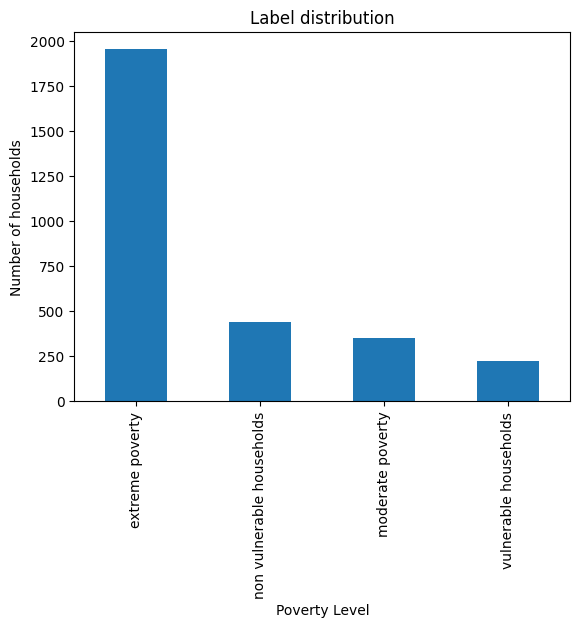

In [5]:
fig, ax = plt.subplots()

# creating the bar plot
hh_label = data['Target'].loc[data["parentesco1"] == 1]
labels = [1,2,3,4]
label_codes = {'extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households'}
hh_label = hh_label.replace(labels,label_codes)
hh_label.value_counts().plot(ax=ax, kind='bar',title="Label distribution", xlabel='Poverty Level', ylabel='Number of households')

<Axes: title={'center': 'Label distribution'}, xlabel='Poverty Level', ylabel='Number of households'>

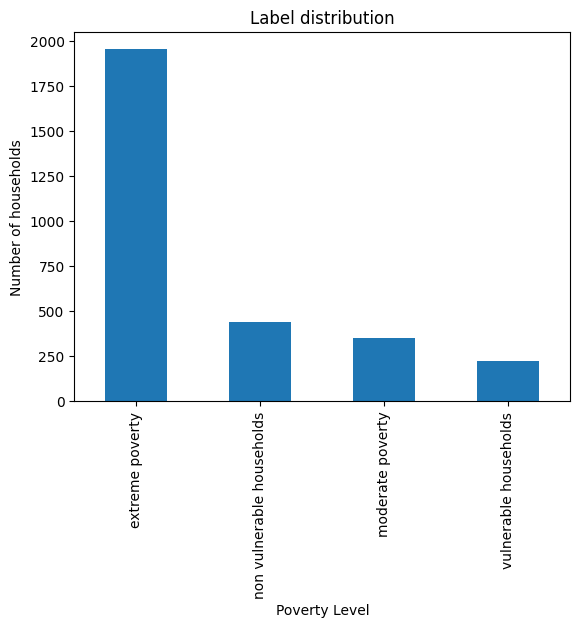

In [6]:
fig, ax = plt.subplots()

# creating the bar plot
hh_label = data['Target'].loc[data["parentesco1"] == 1]
labels = [1,2,3,4]
label_codes = {'extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households'}
hh_label = hh_label.replace(labels,label_codes)
hh_label.value_counts().plot(ax=ax, kind='bar',title="Label distribution", xlabel='Poverty Level', ylabel='Number of households')

In [7]:
#Summary Statistics
data[['age','v2a1','rooms','bedrooms','overcrowding','r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','r4t3','v18q','tamhog','tamviv','escolari','rez_esc','hhsize','hogar_nin','hogar_adul',
     'hogar_mayor','hogar_total','dependency','edjefe','edjefa','meaneduc','qmobilephone']].describe().rename(columns={
         'overcrowding':'# persons per room',
    'v2a1': 'Monthly rent payment rooms','rooms': 'number of all rooms in the house',
    'v18q1': 'number of tablets household owns', 'r4h1': 'Males younger than 12 years of age',
    'r4h2': 'Males 12 years of age and older', 'r4h3': 'Total males in the household',
    'r4m1': 'Females younger than 12 years of age',
    'r4m2': 'Females 12 years of age and older',
    'r4m3': 'Total females in the household',
    'r4t1': 'persons younger than 12 years of age',
    'r4t2': 'persons 12 years of age and older',
    'r4t3': 'Total persons in the household',
    'tamhog': 'size of the household',
    'tamviv': 'number of persons living in the household',
    'escolari': 'years of schooling',
    'rez_esc': 'Years behind in school',
    'hhsize': 'household size',
    'hogar_nin': 'Number of children 0 to 19 in household',
    'hogar_adul': 'Number of adults in household',
    'hogar_mayor': '# of individuals 65+ in the household',
    'hogar_total': '# of total individuals in the household',
    'dependency': 'Dependency rate',
    'edjefe': 'years of education of male head of household',
    'edjefa': 'years of education of female head of household',
    'meaneduc':'average years of education for adults (18+)',
    'qmobilephone': '# of mobile phones age: Age in years'
}).transpose()


,count,mean,std,min,25%,50%,75%,max
age,9557.0,34.303547,21.612261,0.0,17.000000,31.000000,51.000000,97.0
Monthly rent payment rooms,2697.0,165231.606971,150457.133301,0.0,80000.000000,130000.000000,200000.000000,2353477.0
number of all rooms in the house,9557.0,4.955530,1.468381,1.0,4.000000,5.000000,6.000000,11.0
bedrooms,9557.0,2.739981,0.944507,1.0,2.000000,3.000000,3.000000,8.0
# persons per room,9557.0,1.605380,0.819946,0.2,1.000000,1.500000,2.000000,6.0
Males younger than 12 years of age,9557.0,0.385895,0.680779,0.0,0.000000,0.000000,1.000000,5.0
Males 12 years of age and older,9557.0,1.559171,1.036574,0.0,1.000000,1.000000,2.000000,8.0
Total males in the household,9557.0,1.945066,1.188852,0.0,1.000000,2.000000,3.000000,8.0
Females younger than 12 years of age,9557.0,0.399184,0.692460,0.0,0.000000,0.000000,1.000000,6.0
Females 12 years of age and older,9557.0,1.661714,0.933052,0.0,1.000000,1.000000,2.000000,6.0


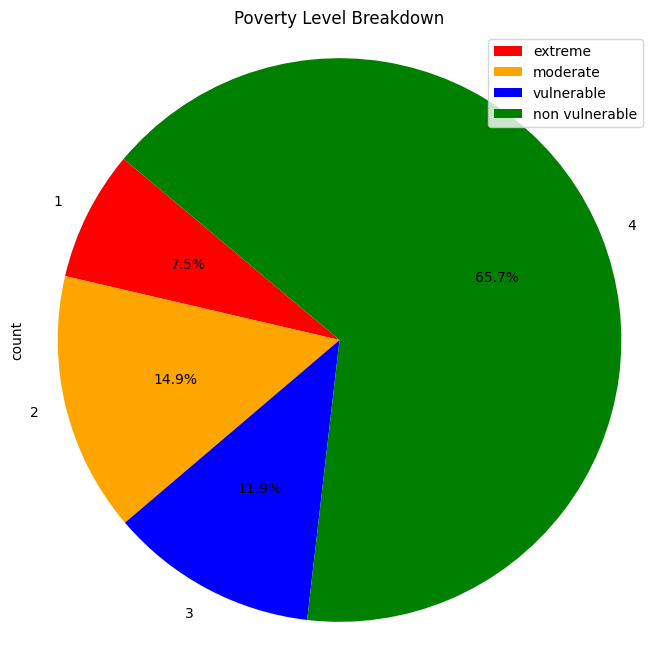

Target
1     222
2     442
3     355
4    1954
Name: count, dtype: int64

In [8]:
# Heads of household
heads = data.loc[data['parentesco1'] == 1].copy()

# Labels for training
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Pie chart of occurrences of each label
label_counts.plot.pie(figsize=(8, 8),
                      colors=colors.values(),
                      autopct='%1.1f%%',
                      startangle=140)

# Formatting
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Poverty Level Breakdown')
plt.legend(labels=list(poverty_mapping.values()), loc='upper right')
plt.show()

label_counts

In [9]:
## Missing values analysis
# Calculate the number of missing values in each column

missing_values = pd.DataFrame(data.isnull().sum()).rename(columns={0: 'Number of missing values'})

missing_values['%'] = (missing_values['Number of missing values'] / len(data)) * 100


# Sort the values by percentage of missing values in descending order and display the top 10 columns

top_missing_columns = missing_values.sort_values('%', ascending=False).head().drop('Target', errors='ignore')
top_missing_columns

,Number of missing values,%
rez_esc,7928,82.954902
v18q1,7342,76.823271
v2a1,6860,71.779847
SQBmeaned,5,0.052318
meaneduc,5,0.052318


In [ ]:
# rez_esc to be dropped
# v18q1 0
# v2a1 (tipovivi 1 & 2, if 1 then 0), (if tipovivi 3, then mean)
# Recalculate SQBmeaned column
# Drop SQBMeaned and Meaneducation

In [11]:
## Data Cleaning
# Drop rez_esc
data.drop("rez_esc",axis=1, inplace=True)

In [12]:
# Replace null values in v18q1 to 0
data["v18q1"].fillna(0, inplace=True)

C:\Users\jayar\AppData\Local\Temp\ipykernel_14568\2893393994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["v18q1"].fillna(0, inplace=True)


In [ ]:
## Pooja
# Correlation b/w

In [ ]:
# Monthly rent payment
data['v2a1'] = data['v2a1'].fillna(0)
data['v2a1'].corr(data['Target'])

0.1669418926314946

In [116]:
#Number of rooms
data['rooms'].corr(data['Target'])

0.22620779724852952

In [113]:
#number of tablets
data['v18q1'] = data['v18q1'].fillna(0)
data['v18q1'].corr(data['Target'])

0.20175435390375004

In [57]:
#Has bathroom
data['v14a'].corr(data['Target'])

0.06338168932999381

In [112]:
#Has refrigerator
data['refrig'].corr(data['Target'])

0.12679236405364225

In [64]:
#Household size
data['hhsize'].corr(data['Target'])

-0.14764217563168508

In [119]:
#years of schooling
data['escolari'].corr(data['Target'])

0.3023052374515582

In [145]:
#Years behind in school
data['edjefe'].corr(data['Target'])

0.24321498032374725

In [117]:
#Mean education
data['meaneduc'].corr(data['Target'])
#.corr(data['Target'])

0.33520321677175763

In [94]:
#bedrooms
data['bedrooms'].corr(data['Target'])
#.corr(data['Target'])

0.16694327425636296

In [109]:
#overcrowding
data['overcrowding'].corr(data['Target'])
#.corr(data['Target'])

-0.28910993420325576

In [96]:
#mobile phone
data['qmobilephone'].corr(data['Target'])
#.corr(data['Target'])

0.19970712434404722

In [97]:
#television
data['television'].corr(data['Target'])

0.1570649932377809

In [101]:
#age
data['age'].corr(data['Target'])

0.11762011994534903

In [147]:
#dependency
data['dependency'].corr(data['Target'])

-0.19440194987343531

In [146]:
#education of male head
data['edjefe'].corr(data['Target'])

0.24321498032374725

In [105]:
#education of female head
data['edjefa'].corr(data['Target'])

0.037331906437203674

In [139]:
#television
data['television'].corr(data['Target'])

0.1570649932377809

In [141]:
#mobilephone
data['mobilephone'].corr(data['Target'])

0.10642120779436459

In [142]:
#computer
data['computer'].corr(data['Target'])

0.18311281130543264

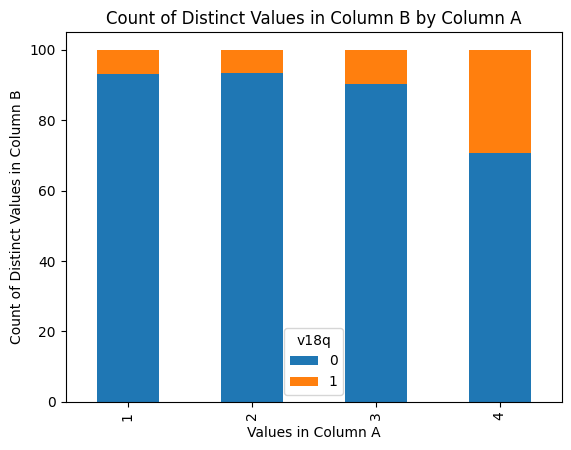

In [48]:
#owns a tablet
grouped1 = data.groupby(['Target', 'v18q'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Values in Column A')
plt.ylabel('Count of Distinct Values in Column B')
plt.title('Count of Distinct Values in Column B by Column A')
plt.show()

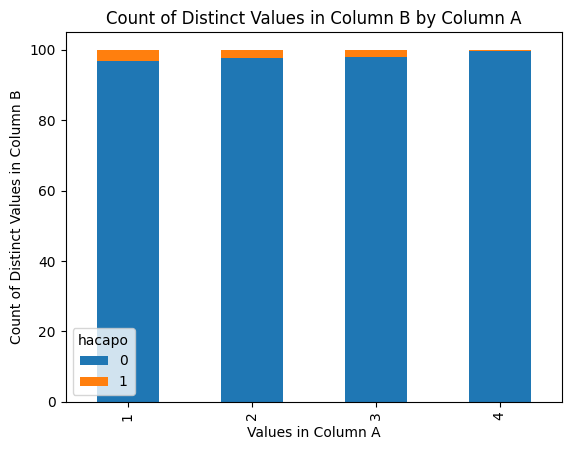

In [54]:
#Overcrowding by rooms
#grouped1 = data.groupby('idhogar')[['hacdor','Target']].first().reset_index()
#grouped2 = grouped1.groupby('Target')[['v18q']].sum().reset_index()
#grouped2['per'] =  grouped2['v18q'].divide(grouped2['v18q'].sum()) * 100
#plt.bar(grouped2['Target'], grouped2['per'])
grouped1 = data.groupby(['Target','hacapo'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Values in Column A')
plt.ylabel('Count of Distinct Values in Column B')
plt.title('Count of Distinct Values in Column B by Column A')
plt.show()

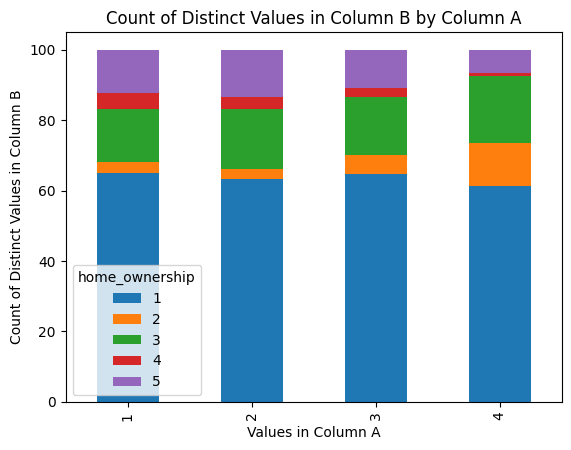

In [68]:
#home ownership
grouped1 = data.groupby(['Target','home_ownership'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Values in Column A')
plt.ylabel('Count of Distinct Values in Column B')
plt.title('Count of Distinct Values in Column B by Column A')
plt.show()

In [12]:
data['home_ownership'] = [sum(t['tipovivi1'],t['tipovivi2'].replace(1,2,inplace=True),
                             t['tipovivi3'].replace(1,3,inplace=True), t['tipovivi4'].replace(1,4,inplace=True),
                             t['tipovivi5'].replace(1,5,inplace=True)) for i,t in data.iterrows()]

AttributeError: 'int' object has no attribute 'replace'

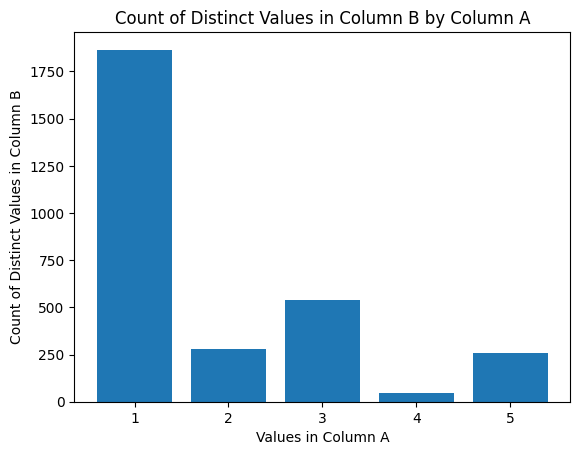

In [69]:
#
grouped = data.groupby('home_ownership')['idhogar'].nunique().reset_index()
grouped['per'] =  grouped['idhogar'].divide(grouped['idhogar'].sum()) * 100
plt.bar(grouped['home_ownership'], grouped['idhogar'])
plt.xlabel('Values in Column A')
plt.ylabel('Count of Distinct Values in Column B')
plt.title('Count of Distinct Values in Column B by Column A')
plt.show()

In [153]:
data['Target'] = data['Target'].replace([1,2,3,4],{'extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households'})

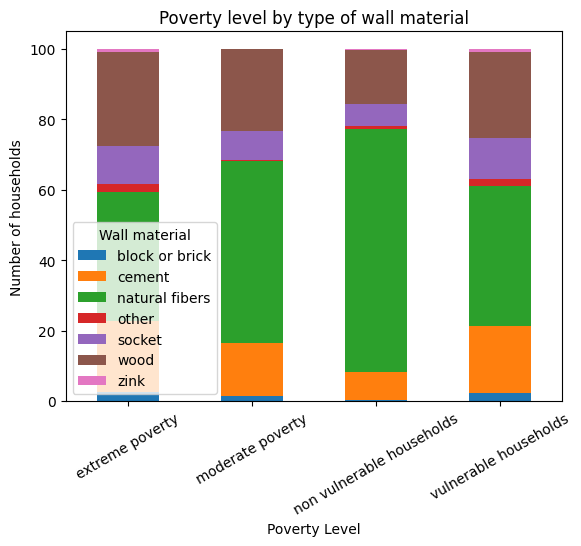

In [160]:
#wall material
data['wall_material'] = data['wall_material'].replace([1,2,3,4,5,6,7,8],
 {'block or brick','socket','cement','waste material','wood','zink','natural fibers','other'})
grouped1 = data.groupby(['Target','wall_material'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100

grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of wall material')
plt.legend(title='Wall material')
plt.xticks(rotation=30)
plt.show()


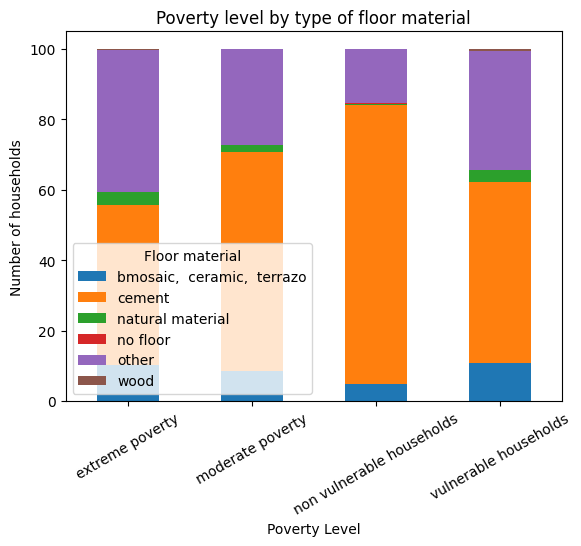

In [161]:
#floor material
data['floor_material'] = data['floor_material'].replace([1,2,3,4,5,6],
 {'bmosaic,  ceramic,  terrazo','cement','other','natural material','no floor','wood'})
grouped1 = data.groupby(['Target','floor_material'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of floor material')
plt.legend(title='Floor material')
plt.xticks(rotation=30)

plt.show()

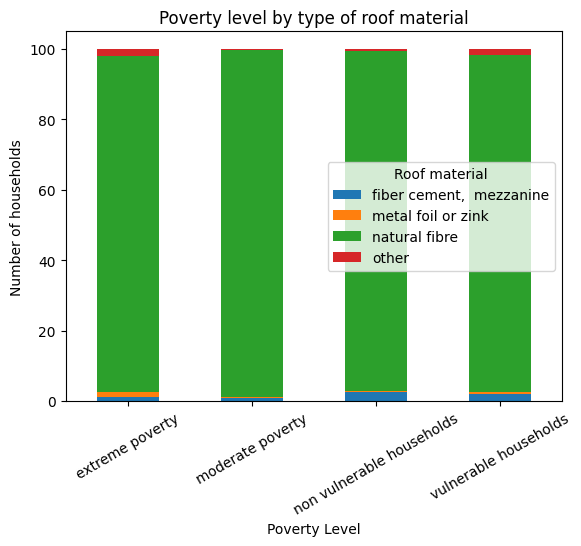

In [162]:
#roof material
data['roof_material'] = data['roof_material'].replace([1,2,3,4],
 {'metal foil or zink','fiber cement,  mezzanine','natural fibre','other'})
grouped1 = data.groupby(['Target','roof_material'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of roof material')
plt.legend(title='Roof material')
plt.xticks(rotation=30)
plt.show()

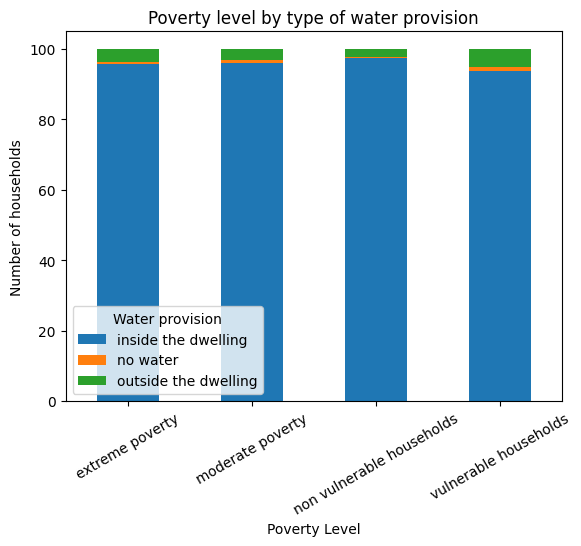

In [163]:
#water
data['water'] = data['water'].replace([1,2,3],
 {'inside the dwelling','outside the dwelling','no water'})
grouped1 = data.groupby(['Target','water'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of water provision')
plt.legend(title='Water provision')
plt.xticks(rotation=30)

plt.show()

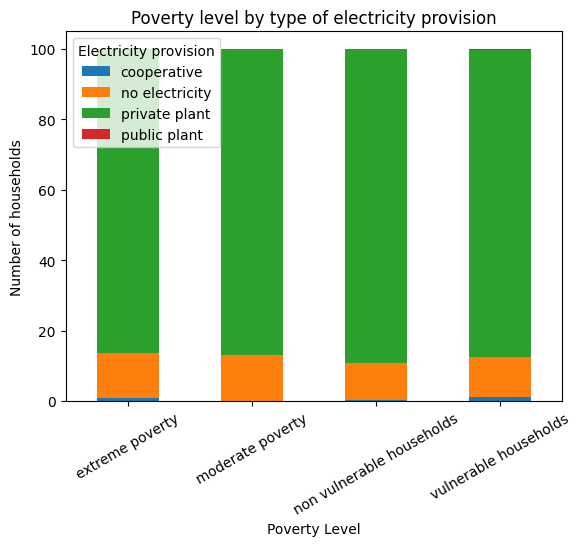

In [164]:
#electricity
data['electricity'] = data['electricity'].replace([1,2,3,4],
 {'public plant','private plant','no electricity','cooperative'})
grouped1 = data.groupby(['Target','electricity'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of electricity provision')
plt.legend(title='Electricity provision')
plt.xticks(rotation=30)

plt.show()

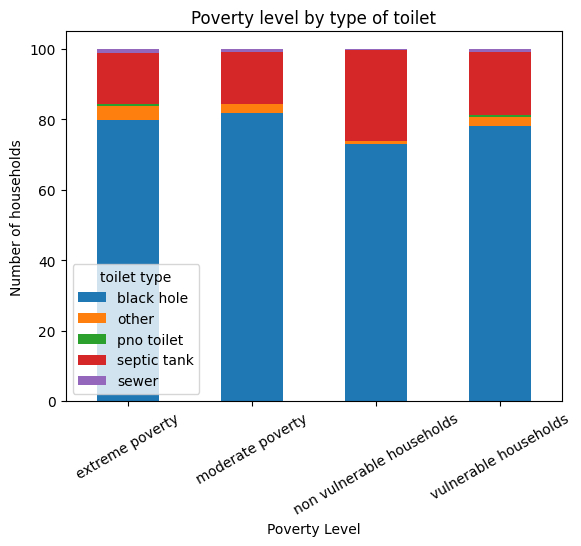

In [165]:
#toilet
data['toilet'] = data['toilet'].replace([1,2,3,4,5],
 {'pno toilet','sewer','septic tank','black hole','other'})
grouped1 = data.groupby(['Target','toilet'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of toilet')
plt.legend(title='toilet type')
plt.xticks(rotation=30)

plt.show()

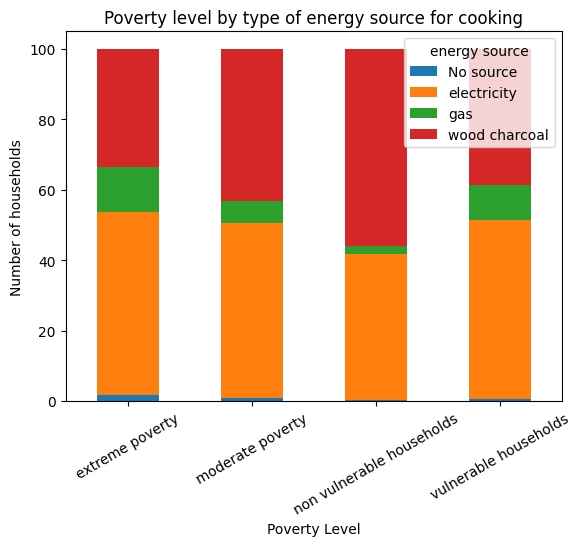

In [166]:
#energy
data['energy'] = data['energy'].replace([1,2,3,4],
 {'No source','electricity','gas','wood charcoal'})
grouped1 = data.groupby(['Target','energy'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of energy source for cooking')
plt.legend(title='energy source')
plt.xticks(rotation=30)

plt.show()

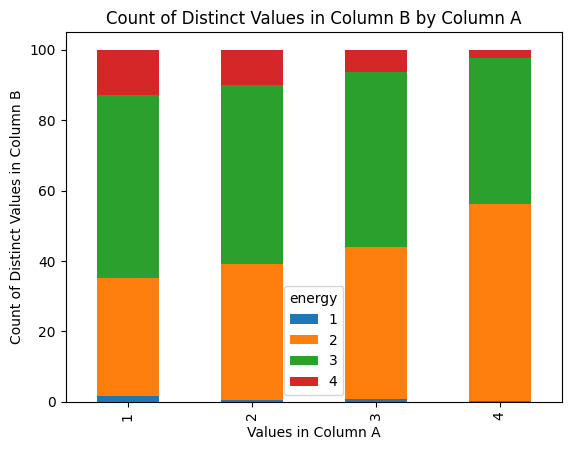

In [77]:
#rubbish
grouped1 = data.groupby(['Target','energy'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Values in Column A')
plt.ylabel('Count of Distinct Values in Column B')
plt.title('Count of Distinct Values in Column B by Column A')
plt.show()

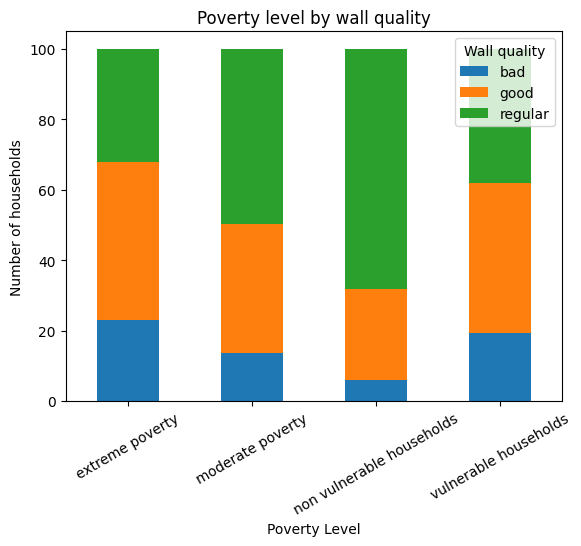

In [167]:
#wall quality
data['wall_quality'] = data['wall_quality'].replace([1,2,3],
 {'bad','regular','good'})
grouped1 = data.groupby(['Target','wall_quality'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by wall quality')
plt.legend(title='Wall quality')
plt.xticks(rotation=30)

plt.show()

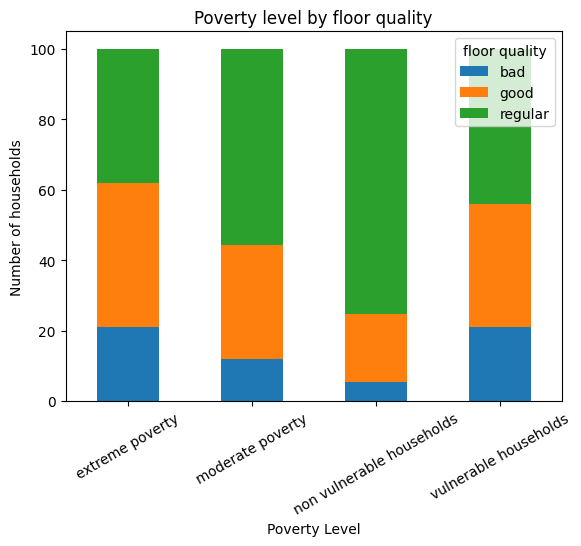

In [168]:
#floor quality
data['floor_quality'] = data['floor_quality'].replace([1,2,3],
 {'bad','regular','good'})
grouped1 = data.groupby(['Target','floor_quality'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by floor quality')
plt.legend(title='floor quality')
plt.xticks(rotation=30)

plt.show()

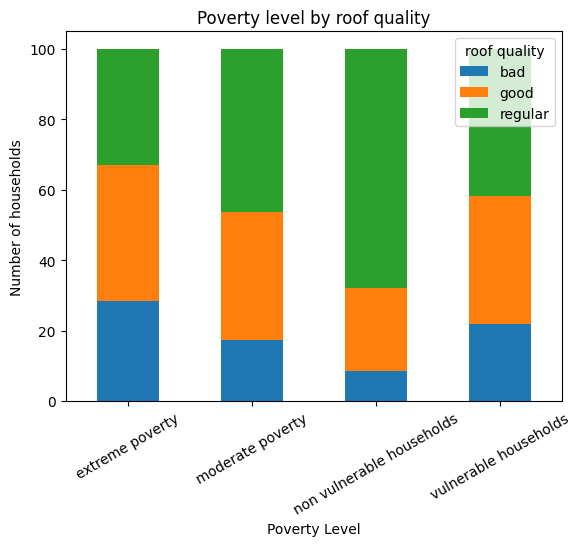

In [169]:
#roof quality
data['roof_quality'] = data['roof_quality'].replace([1,2,3],
 {'bad','regular','good'})
grouped1 = data.groupby(['Target','roof_quality'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by roof quality')
plt.legend(title='roof quality')
plt.xticks(rotation=30)

plt.show()

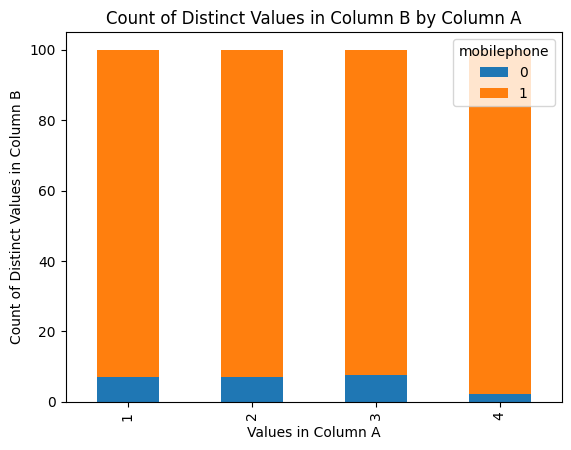

In [98]:
#mobile phone
grouped1 = data.groupby(['Target','mobilephone'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Values in Column A')
plt.ylabel('Count of Distinct Values in Column B')
plt.title('Count of Distinct Values in Column B by Column A')
plt.show()

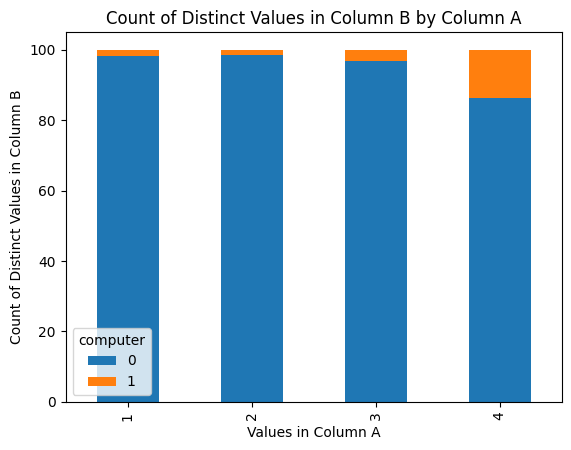

In [99]:
#computer
grouped1 = data.groupby(['Target','computer'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Values in Column A')
plt.ylabel('Count of Distinct Values in Column B')
plt.title('Count of Distinct Values in Column B by Column A')
plt.show()

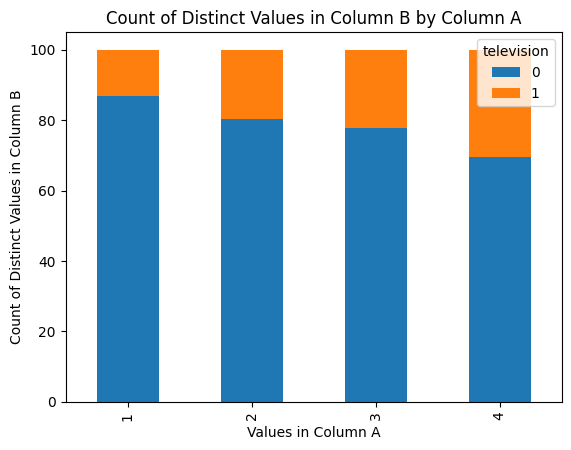

In [100]:
#television
grouped1 = data.groupby(['Target','television'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Values in Column A')
plt.ylabel('Count of Distinct Values in Column B')
plt.title('Count of Distinct Values in Column B by Column A')
plt.show()